In [1]:
import numpy as np
import pandas as pd
import glob
import os

from scipy.io import loadmat
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

## Slit Sc

In [69]:
direc = r"./dataFolder/Submission 3/Final Submission/Data to be uploaded to Dryad/Figure2/"

In [70]:
file = pd.read_csv(direc + 'merged_TD', sep = "\t")
data = file.loc[:,('Treatment', 'Fly', 'wing_mean.Corleft', 'Average.Corleft', 'Average.Corright')]
data.columns = ['treatment', 'flyID', 'winglength', 'ClippedWingHz', 'IntactWingHz']

bins = [0.3, 0.5, 0.6, 0.7 ,0.9, 1]
data['binned'] = pd.cut(data['winglength'], bins, 
                        labels=np.array([0.3, 0.5, 0.6, 0.7, 0.9]))
new_df = data.drop(['winglength'], axis=1)

In [71]:
data.head()

,treatment,flyID,winglength,ClippedWingHz,IntactWingHz,binned
0,Intact,Fly1,0.821102,93.154528,93.349334,0.7
1,Intact,Fly1,0.666827,101.806114,102.028900,0.6
2,Intact,Fly1,0.573657,108.858352,108.810557,0.5
3,Intact,Fly1,0.461742,93.192249,92.950641,0.3
4,Intact,Fly1,0.391743,84.506527,83.927994,0.3


### compute the largest difference between clipped and intact wings for each fly

In [72]:
new_df = pd.DataFrame(data = None, columns = data.columns)

ii = 0
for trt, df in data.groupby('treatment'):
    for flyID, flydf in df.groupby('flyID'):
        temp = flydf.loc[(flydf['IntactWingHz'] - flydf['ClippedWingHz']).abs().idxmax(), :]
        new_df = new_df.append(temp, ignore_index = True)

In [73]:
new_df

,treatment,flyID,winglength,ClippedWingHz,IntactWingHz,binned
0,Intact,Fly1,0.391743,84.506527,83.927994,0.3
1,Intact,Fly2,1.000000,109.348125,112.487110,0.9
2,Intact,Fly3,0.759073,119.158525,119.983680,0.7
3,Intact,Fly5,0.620712,117.361145,117.687945,0.6
4,Intact,Fly6,0.720811,141.340205,140.790750,0.7
5,Intact,Fly7,0.582596,121.059640,120.698435,0.5
6,Slit,Fly1,0.617825,150.000000,110.000000,0.6
7,Slit,Fly2,0.407028,156.900000,86.270000,0.3
8,Slit,Fly7,0.516695,134.600000,84.620000,0.5
9,Slit,Fly8,0.453098,145.800000,83.330000,0.3


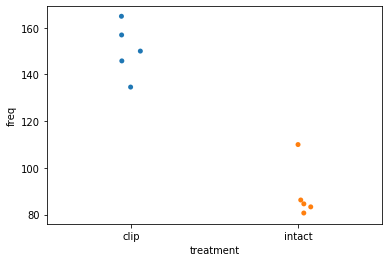

In [74]:
temp = pd.DataFrame({'clip': clipw, 'intact': intactw})
temp_sns = pd.melt(temp, value_vars = ['clip', 'intact'],
                  value_name = 'freq',
                  var_name = 'treatment')
sns.stripplot(x = 'treatment', y = 'freq', data = temp_sns)

In [82]:
for trt, df in new_df.groupby('treatment'):
    clipw = df.ClippedWingHz.values  
    intactw = df.IntactWingHz.values
    U, p = stats.wilcoxon(clipw, intactw, alternative="two-sided")
    print('%s thorax contralateral wings, p value is %0.3f and U value is %0.3f' %(trt, p, U))

Intact thorax contralateral wings, p value is 0.753 and U value is 9.000
Slit thorax contralateral wings, p value is 0.043 and U value is 0.000


In [34]:
for trt, df in new_df.groupby('treatment'):
    clipw = df.ClippedWingHz.values  
    intactw = df.IntactWingHz.values
    U, p = stats.wilcoxon(clipw, intactw, alternative="greater")
    print('%s thorax contralateral wings, p value is %0.3f and U value is %0.3f' %(trt, p, U))

Intact thorax contralateral wings, p value is 0.623 and U value is 9.000
Slit thorax contralateral wings, p value is 0.022 and U value is 15.000


C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [37]:
SlitSc_SumStat = pd.DataFrame(data = None,
                             index = data.binned.unique(),
                             columns = data.treatment.unique())

In [38]:
# stats for each winglength

for trt, df_trt in data.groupby('treatment'):
    for binned, df_binned in df_trt.groupby('binned'):
        clipw = df_binned.ClippedWingHz.values  
        intactw = df_binned.IntactWingHz.values
        U, p = stats.wilcoxon(clipw, intactw)
        SlitSc_SumStat.loc[binned,trt] = p
#         print('%s and %s, p value is %0.3f and U value is %0.8f' %(trt, binned, p, U))

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\morestats.py:2863: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [39]:
SlitSc_SumStat

,Intact,Slit
0.7,0.248864,0.317311
0.6,0.715001,0.0678892
0.5,0.345448,0.0678892
0.3,0.0277078,0.108809
0.9,0.0796158,0.59298


In [9]:
data[(data.treatment == 'Intact') & (data.binned == 0.3)]

,treatment,flyID,winglength,ClippedWingHz,IntactWingHz,binned
3,Intact,Fly1,0.461742,93.192249,92.950641,0.3
4,Intact,Fly1,0.391743,84.506527,83.927994,0.3
9,Intact,Fly2,0.399406,105.311196,104.269030,0.3
14,Intact,Fly3,0.469790,89.220142,89.115336,0.3
19,Intact,Fly5,0.439044,126.764700,126.715680,0.3
29,Intact,Fly7,0.480691,136.785680,136.726155,0.3


In [11]:
data[(data.treatment == 'Slit') & (data.binned == 0.5)]

,treatment,flyID,winglength,ClippedWingHz,IntactWingHz,binned
37,Slit,Fly2,0.540692,110.7,83.03,0.5
42,Slit,Fly7,0.516695,134.6,84.62,0.5
46,Slit,Fly8,0.510228,130.1,84.55,0.5
51,Slit,Fly9,0.505850,143.9,84.21,0.5


## loaded haltere

In [68]:
direc = r"./dataFolder/Submission 3/Final Submission/Data to be uploaded to Dryad/HaltereLoading_Figure5/"

In [69]:
data = pd.read_csv(direc + 'compiledDataForAggregratePlots.csv')

In [70]:
data.head()

,Unnamed: 0,flyID,wingHz,leftHalHz,rightHalHz,treatment
0,0,fly1,96.904762,97.142857,96.904762,intacthaltere
1,1,fly1,102.130326,102.393484,102.393484,loadedhaltere1
2,2,fly1,112.452700,107.893285,112.125903,loadedhaltere2
3,3,fly1,109.064327,49.968041,109.356725,loadedhaltere3
4,4,fly1,109.064327,109.356725,109.064327,removedload


In [71]:
subset = data[data.treatment == 'loadedhaltere2']
subset

,Unnamed: 0,flyID,wingHz,leftHalHz,rightHalHz,treatment
2,2,fly1,112.452700,107.893285,112.125903,loadedhaltere2
7,7,fly2,101.578947,69.240206,101.842105,loadedhaltere2
12,12,fly3,90.888293,46.840227,91.361660,loadedhaltere2
17,17,fly4,104.502924,64.786041,104.532164,loadedhaltere2
22,22,fly5,89.760964,64.431354,89.958592,loadedhaltere2
27,27,fly8,98.834586,98.834586,98.571429,loadedhaltere2


#### wilcoxon test

In [74]:
loadedHal_summaryStats = pd.DataFrame(data = None, 
                                      index = data.treatment.unique(), 
                                      columns = ['loadedHal-wing', 'controlHal-wing'])

for trt, df in data.groupby('treatment'):
    rightHal= df.rightHalHz.values
    leftHal = df.leftHalHz.values
    wing = df.wingHz.values

    U, p = stats.wilcoxon(rightHal, wing, alternative='less')
#     print('left-right haltere, p value is %0.5f and U value is %0.5f' %(p, U))
    loadedHal_summaryStats.loc[trt, 'controlHal-wing'] = p

    U, p = stats.wilcoxon(leftHal, wing, alternative='less')
#     print('left haltere-wing, p value is %0.5f and U value is %0.5f' %(p, U))
    loadedHal_summaryStats.loc[trt, 'loadedHal-wing'] = p
loadedHal_summaryStats.to_csv(r'./dataFolder/Submission 3/Final Submission/Data to be uploaded to Dryad/HaltereLoading_Figure5/summaryStats.csv')
loadedHal_summaryStats

,loadedHal-wing,controlHal-wing
intacthaltere,0.875568,0.827384
loadedhaltere1,0.963031,0.986146
loadedhaltere2,0.0138539,0.662929
loadedhaltere3,0.0138539,0.986146
removedload,0.231536,0.342915


#### perform a kruskal Wallis test

In [75]:
loadedHal_summaryStats = pd.DataFrame(data = None, 
                                      index = data.treatment.unique(), 
                                      columns = ['kruskal'])

for trt, df in data.groupby('treatment'):
    rightHal= df.rightHalHz.values
    leftHal = df.leftHalHz.values
    wing = df.wingHz.values

    U, p = stats.kruskal(rightHal, wing, leftHal)
    loadedHal_summaryStats.loc[trt, 'kruskal'] = p
loadedHal_summaryStats

,kruskal
intacthaltere,0.955645
loadedhaltere1,0.894634
loadedhaltere2,0.144327
loadedhaltere3,0.00309559
removedload,0.981154


In [76]:
# pairwise tukey for loadedhaltere3

subset = data[data['treatment'] == 'loadedhaltere3']
subset.drop(columns = ['Unnamed: 0', 'flyID', 'treatment'], inplace = True)

stacked_data = pd.DataFrame()
bd = []
freq = []
for column in subset.columns:
    bd.extend([column]*6)
    freq.extend(subset[column].values)
stacked_data['bodypart'] = bd
stacked_data['frequency'] = freq

############################################################
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

# Set up the data for comparison (creates a specialised object)
MultiComp = MultiComparison(stacked_data['frequency'],
                            stacked_data['bodypart'])

# Show all pair-wise comparisons:
# Print the comparisons
print(MultiComp.tukeyhsd().summary())

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj  lower    upper  reject
------------------------------------------------------------
 leftHalHz rightHalHz  47.7754 0.001  33.2169 62.3338   True
 leftHalHz     wingHz  47.5373 0.001  32.9788 62.0958   True
rightHalHz     wingHz   -0.238   0.9 -14.7965 14.3204  False
------------------------------------------------------------


## EpiRidge Cut

In [47]:
direc= r"./dataFolder/Submission 3/Final Submission/Data to be uploaded to Dryad/EpiRidgeCut_Figure3/"

In [48]:
data = pd.read_csv(direc + 'compiledDataForAggregratePlots.csv')

In [49]:
data.head()

,Unnamed: 0,flyID,treatment,winglength,wingHz,leftHalHz,rightHalHz,binned
0,0,fly1,cutwing1_1,0.82,138.095238,138.095238,138.095238,"(0.7, 0.9]"
1,1,fly1,cutwing2_1,0.72,132.321429,132.797619,132.310924,"(0.7, 0.9]"
2,2,fly1,cutwing3_1,0.58,151.648352,151.904762,151.831502,"(0.5, 0.6]"
3,3,fly1,cutwing4_1,0.50,138.387470,130.766537,137.388943,"(0.4, 0.5]"
4,4,fly1,cutwing5_1,0.38,187.272727,124.550654,125.486992,"(0.3, 0.4]"


In [52]:
subset = data[(data.binned == '(0.5, 0.6]')]
subset

,Unnamed: 0,flyID,treatment,winglength,wingHz,leftHalHz,rightHalHz,binned
2,2,fly1,cutwing3_1,0.58,151.648352,151.904762,151.831502,"(0.5, 0.6]"
8,8,fly2,cutwing3_1,0.53,135.773809,81.405410,136.190476,"(0.5, 0.6]"
14,14,fly3,cutwing3_1,0.55,130.644258,121.367819,130.525210,"(0.5, 0.6]"
20,20,fly5,cutwing3_1,0.55,152.289377,77.495974,90.231126,"(0.5, 0.6]"
25,25,fly6,cutwing3_1,0.51,118.201324,74.224054,108.497306,"(0.5, 0.6]"


In [53]:
wing = subset.wingHz.values
left = subset.leftHalHz.values
right = subset.rightHalHz.values

U, p = stats.wilcoxon(wing, left, alternative='two-sided')
print('wing and ridge cut haltere, p value is %0.5f and U value %0.3f' %(p,U))

U, p = stats.wilcoxon(wing, right, alternative='two-sided')
print('wing and control haltere, p value is %0.5f and U value %0.3f' %(p, U))

wing and ridge cut haltere, p value is 0.07962 and U value 1.000
wing and control haltere, p value is 0.50018 and U value 5.000


In [54]:
# do wilcoxon for each winglength

EpiRidge_SumStats = pd.DataFrame(data = None,
                                index = data.binned.unique(),
                                columns = ['RidgeCutHal-wing', 'controlHal-wing'])

for binned, df_binned in data.groupby('binned'):
#     print(binned)
    wing = df_binned.wingHz.values
    left = df_binned.leftHalHz.values
    right = df_binned.rightHalHz.values

    U, p = stats.wilcoxon(wing, left, alternative='greater')
    EpiRidge_SumStats.loc[binned, 'RidgeCutHal-wing']= p
#     print('wing and ridge cut haltere, p value is %0.5f and U value %0.3f' %(p,U))

    U, p = stats.wilcoxon(wing, right, alternative='greater')
    EpiRidge_SumStats.loc[binned, 'controlHal-wing']= p
#     print('wing and control haltere, p value is %0.5f and U value %0.3f' %(p, U))

In [55]:
EpiRidge_SumStats.to_csv(direc + 'summaryStats.csv')
EpiRidge_SumStats

,RidgeCutHal-wing,controlHal-wing
"(0.7, 0.9]",0.458256,0.541744
"(0.5, 0.6]",0.0398079,0.250092
"(0.4, 0.5]",0.0215572,0.0215572
"(0.3, 0.4]",0.0215572,0.0215572
"(0.9, 1.0]",0.962632,0.553631
"(0.6, 0.7]",0.0398079,0.657085


In [56]:
## do a kruskal wallis as well

EpiRidge_SumStats = pd.DataFrame(data = None,
                                index = data.binned.unique(),
                                columns = ['kruskal'])

for binned, df_binned in data.groupby('binned'):
    wing = df_binned.wingHz.values
    left = df_binned.leftHalHz.values
    right = df_binned.rightHalHz.values

    U, p = stats.kruskal(wing, left, right)
    EpiRidge_SumStats.loc[binned, 'kruskal'] = p
EpiRidge_SumStats

,kruskal
"(0.7, 0.9]",0.996287
"(0.5, 0.6]",0.208045
"(0.4, 0.5]",0.0086517
"(0.3, 0.4]",0.0086517
"(0.9, 1.0]",0.852552
"(0.6, 0.7]",0.22091


In [65]:
# pairwise tukey for loadedhaltere3

subset = data[data['binned'] == '(0.5, 0.6]']
subset.drop(columns = ['Unnamed: 0', 'flyID', 'treatment', 'winglength', 'binned'], inplace = True)

stacked_data = pd.DataFrame()
bd = []
freq = []
for column in subset.columns:
    bd.extend([column]*len(subset))
    freq.extend(subset[column].values)
stacked_data['bodypart'] = bd
stacked_data['frequency'] = freq


###########################################################
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

# Set up the data for comparison (creates a specialised object)
MultiComp = MultiComparison(stacked_data['frequency'],
                            stacked_data['bodypart'])

# Show all pair-wise comparisons:

# Print the comparisons

print(MultiComp.tukeyhsd().summary())

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
 leftHalHz rightHalHz  22.1755 0.3865 -20.9456 65.2966  False
 leftHalHz     wingHz  36.4318  0.102  -6.6893 79.5529  False
rightHalHz     wingHz  14.2563 0.6551 -28.8648 57.3774  False
-------------------------------------------------------------


In [66]:
# pairwise tukey for loadedhaltere3

subset = data[data['binned'] == '(0.4, 0.5]']
subset.drop(columns = ['Unnamed: 0', 'flyID', 'treatment', 'winglength', 'binned'], inplace = True)

stacked_data = pd.DataFrame()
bd = []
freq = []
for column in subset.columns:
    bd.extend([column]*len(subset))
    freq.extend(subset[column].values)
stacked_data['bodypart'] = bd
stacked_data['frequency'] = freq


###########################################################
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

# Set up the data for comparison (creates a specialised object)
MultiComp = MultiComparison(stacked_data['frequency'],
                            stacked_data['bodypart'])

# Show all pair-wise comparisons:

# Print the comparisons

print(MultiComp.tukeyhsd().summary())

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
 leftHalHz rightHalHz   5.7841 0.8289 -21.1809 32.7491  False
 leftHalHz     wingHz  47.4308 0.0014  20.4659 74.3958   True
rightHalHz     wingHz  41.6467 0.0037  14.6817 68.6117   True
-------------------------------------------------------------


In [67]:
# pairwise tukey for loadedhaltere3

subset = data[data['binned'] == '(0.3, 0.4]']
subset.drop(columns = ['Unnamed: 0', 'flyID', 'treatment', 'winglength', 'binned'], inplace = True)

stacked_data = pd.DataFrame()
bd = []
freq = []
for column in subset.columns:
    bd.extend([column]*len(subset))
    freq.extend(subset[column].values)
stacked_data['bodypart'] = bd
stacked_data['frequency'] = freq


###########################################################
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

# Set up the data for comparison (creates a specialised object)
MultiComp = MultiComparison(stacked_data['frequency'],
                            stacked_data['bodypart'])

# Show all pair-wise comparisons:

# Print the comparisons

print(MultiComp.tukeyhsd().summary())

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1     group2   meandiff p-adj   lower    upper   reject
--------------------------------------------------------------
 leftHalHz rightHalHz   5.7892 0.8824 -26.5939  38.1723  False
 leftHalHz     wingHz  74.6939  0.001  42.3108 107.0771   True
rightHalHz     wingHz  68.9047  0.001  36.5216 101.2879   True
--------------------------------------------------------------
